In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Load data
train_data = pd.read_excel("THA2train.xlsx")
validate_data = pd.read_excel("THA2validate.xlsx")

# Extract features and labels
train_X = train_data.iloc[:, :-1].values
train_y = train_data.iloc[:, -1].values.reshape(-1, 1)

validate_X = validate_data.iloc[:, :-1].values
validate_y = validate_data.iloc[:, -1].values.reshape(-1, 1)

In [11]:
# Normalize features (Preprocessing step)
train_X = (train_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)
validate_X = (validate_X - np.mean(validate_X, axis=0)) / np.std(validate_X, axis=0)

# One-hot encode labels to represent categorical variables
train_y_one_hot = np.eye(2)[train_y.flatten()]
validate_y_one_hot = np.eye(2)[validate_y.flatten()]

In [12]:
# Define activation functions
# ReLU is widely used in hidden layers as it allows the model to learn complex patterns and representations.
def relu(x):
    return np.maximum(0, x)


# The Sigmoid function is commonly used in the output layer of binary classification models
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Define loss function
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [13]:
np.random.seed(42)

input_size = 2
hidden_size = 10
output_size = 2

# Initialize parameters to zero
weights_0 = np.zeros((input_size, hidden_size))
bias_0 = np.zeros((1, hidden_size))

weights_1 = np.zeros((hidden_size, hidden_size))
bias_1 = np.zeros((1, hidden_size))

weights_2 = np.zeros((hidden_size, output_size))
bias_2 = np.zeros((1, output_size))

In [14]:
# Training parameters
learning_rate = 0.01
epochs = 1000
batch_size = 32

# Early stopping parameters
patience = 20
best_loss = np.inf
early_stop_count = 0

In [15]:
# Lists to store training and validation losses
training_losses = []
validation_losses = []

# Training loop
for epoch in range(epochs):
    for i in range(0, len(train_X), batch_size):
        # Mini-batch
        X_batch = train_X[i : i + batch_size]
        y_batch = train_y_one_hot[i : i + batch_size]

        # Forward pass
        layer_0 = X_batch
        layer_1 = relu(np.dot(layer_0, weights_0) + bias_0)
        layer_2 = relu(np.dot(layer_1, weights_1) + bias_1)
        output = sigmoid(np.dot(layer_2, weights_2) + bias_2)

        # Calculate loss
        loss = binary_cross_entropy_loss(y_batch, output)

        # Backward pass
        d_output = output - y_batch
        d_layer_2 = np.dot(d_output, weights_2.T) * (layer_2 > 0)
        d_layer_1 = np.dot(d_layer_2, weights_1.T) * (layer_1 > 0)

        # Update weights and biases
        weights_2 -= learning_rate * np.dot(layer_2.T, d_output) / batch_size
        bias_2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True) / batch_size

        weights_1 -= learning_rate * np.dot(layer_1.T, d_layer_2) / batch_size
        bias_1 -= learning_rate * np.sum(d_layer_2, axis=0, keepdims=True) / batch_size

        weights_0 -= learning_rate * np.dot(layer_0.T, d_layer_1) / batch_size
        bias_0 -= learning_rate * np.sum(d_layer_1, axis=0, keepdims=True) / batch_size

    # Calculate validation loss
    layer_1_val = relu(np.dot(validate_X, weights_0) + bias_0)
    layer_2_val = relu(np.dot(layer_1_val, weights_1) + bias_1)
    output_val = sigmoid(np.dot(layer_2_val, weights_2) + bias_2)
    val_loss = binary_cross_entropy_loss(validate_y_one_hot, output_val)

    # Print loss and check for early stopping
    print(f"Epoch: {epoch}, Training Loss: {loss}, Validation Loss: {val_loss}")

    # Store losses for plotting
    training_losses.append(loss)
    validation_losses.append(val_loss)


Epoch: 0, Training Loss: 0.6931592092356419, Validation Loss: 0.6931471805600078
Epoch: 1, Training Loss: 0.6931591828210342, Validation Loss: 0.6931471805601868
Epoch: 2, Training Loss: 0.693159157240238, Validation Loss: 0.693147180560472
Epoch: 3, Training Loss: 0.6931591324669288, Validation Loss: 0.6931471805608526
Epoch: 4, Training Loss: 0.6931591084756146, Validation Loss: 0.6931471805613191
Epoch: 5, Training Loss: 0.6931590852416082, Validation Loss: 0.6931471805618634
Epoch: 6, Training Loss: 0.6931590627410009, Validation Loss: 0.6931471805624763
Epoch: 7, Training Loss: 0.6931590409506405, Validation Loss: 0.6931471805631508
Epoch: 8, Training Loss: 0.6931590198481046, Validation Loss: 0.69314718056388
Epoch: 9, Training Loss: 0.6931589994116797, Validation Loss: 0.6931471805646573
Epoch: 10, Training Loss: 0.6931589796203371, Validation Loss: 0.6931471805654769
Epoch: 11, Training Loss: 0.6931589604537127, Validation Loss: 0.6931471805663331
Epoch: 12, Training Loss: 0.69

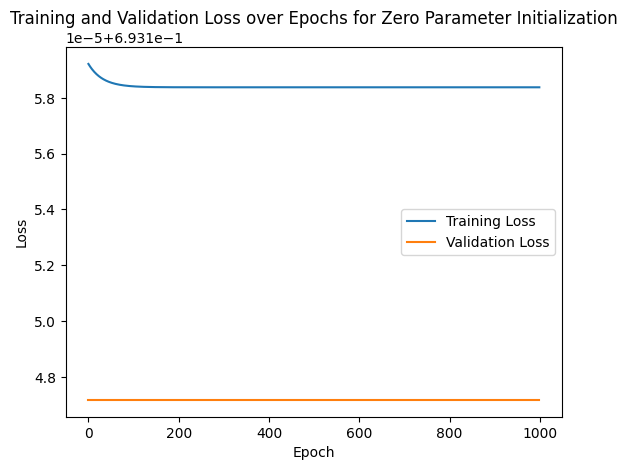

Final Accuracy: 0.5
Confusion Matrix:
[[20.49977063 20.50022937]
 [20.49977063 20.50022937]]


In [16]:
# Plot the loss over epochs
plt.plot(training_losses, label="Training Loss")
plt.plot(validation_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs for Zero Parameter Initialization")
plt.legend()
plt.show()

# Final accuracy and confusion matrix on the validation set
predicted_labels = np.argmax(output_val, axis=1)
accuracy = np.mean(predicted_labels == validate_y.flatten())
confusion_matrix = np.dot(np.transpose(validate_y_one_hot), output_val)
print(f"Final Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix)